# ******* 2023 Data Science Internship Challenge

## Instructions:
- This notebook contains three sections desinged to test your Data Science and programming knowledge.
- Please list any libraries you import or install using pip below. We have added some that might be helpful


In [48]:
#pip install pandas numpy scikit-learn matplotlib

In [49]:
import pandas as pd
import numpy as np
#Include any additional imports you use here

## Section 1
In this section, you will be working with csv files. There is a total of 3 files thay you will need to load up, clean and draw insgits from
```
- bmi.csv -> This dataset shows the mean BMI for people over 18 years old per country, and split into [Male, Female, both sexes] for each year from 1975-2016.
- gni.csv -> The Gross National Income by country, the indicator used is -GNI per capita, Atlas method (current US$), given by the code NY.GNP.PCAP.CD-. Each country is sampled per year for when the data is available.
- life_expec.csv -> Each country is given Life expectancy at birth (years), Life expectancy at age 60 (years), Healthy life expectancy (HALE) at birth (years) Healthy life expectancy (HALE) at age 60 (years), for Male, Female, and both sexes. Each country is sampled at 4 years (2000,2010,2015,2019)
```
To get more insight into the datasets, below are links to World Health Organization to describe the terms further:
- [BMI](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)
- [GNI](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1144)
- [Life Expectancy](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)

Reshape the datasets to look like the following figures, and display the shape of the new datasets. Answer questions regarding the resulting datasets when prompoted:

#### - ```bmi.csv```
```
          Country  Year        Both Sexes     Male     Female
0     Afghanistan  2016          23.0         22.3     23.7 
1     Afghanistan  2015          22.9         22.3     23.6 
2     Afghanistan  2014          22.8         22.2     23.5 
3     Afghanistan  2013          22.8         22.1     23.4 
4     Afghanistan  2012          22.7         22.0     23.3 
...           ...   ...           ...          ...      ...
8143     Zimbabwe  1979          22.0         20.3     23.6 
8144     Zimbabwe  1978          21.9         20.2     23.6 
8145     Zimbabwe  1977          21.9         20.2     23.5 
8146     Zimbabwe  1976          21.8         20.1     23.5 
8147     Zimbabwe  1975          21.8         20.0     23.5 
```

### First step is to study the data

In [50]:
bmi_data = pd.read_csv("bmi.csv")
bmi_data

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)",...,"Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)"
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,23.0 [21.6-24.4],22.3 [19.8-24.9],23.7 [22.8-24.6],22.9 [21.6-24.3],22.3 [19.8-24.8],23.6 [22.7-24.5],22.8 [21.5-24.2],22.2 [19.7-24.7],23.5 [22.7-24.3],...,19.3 [16.6-21.9],19.2 [17.3-21.0],19.2 [16.6-21.8],19.2 [16.4-21.8],19.1 [17.2-21.0],19.1 [16.5-21.8],19.1 [16.2-21.8],18.9 [17.0-20.9],19.0 [16.3-21.7],18.9 [16.0-21.8]
4,Albania,26.8 [25.9-27.6],27.0 [25.9-28.2],26.5 [25.2-27.9],26.7 [25.9-27.5],26.9 [25.8-28.0],26.4 [25.2-27.7],26.6 [25.8-27.3],26.8 [25.8-27.8],26.3 [25.2-27.5],...,23.5 [21.1-25.9],23.6 [22.1-25.2],23.7 [21.9-25.6],23.5 [21.0-26.0],23.6 [21.9-25.2],23.7 [21.7-25.7],23.5 [20.9-26.0],23.5 [21.8-25.2],23.6 [21.6-25.7],23.4 [20.7-26.1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Venezuela (Bolivarian Republic of),26.7 [26.1-27.2],26.6 [25.9-27.3],26.7 [25.9-27.5],26.6 [26.1-27.1],26.6 [25.9-27.2],26.7 [26.0-27.4],26.6 [26.1-27.1],26.6 [25.9-27.2],26.6 [25.9-27.3],...,24.0 [21.7-26.3],24.0 [22.5-25.5],24.1 [22.2-26.1],23.9 [21.4-26.3],23.9 [22.3-25.5],24.0 [22.0-26.1],23.7 [21.2-26.3],23.8 [22.1-25.5],23.9 [21.8-26.1],23.6 [21.0-26.3]
193,Viet Nam,21.9 [21.5-22.3],21.9 [21.4-22.5],21.9 [21.3-22.5],21.7 [21.4-22.1],21.8 [21.3-22.3],21.7 [21.2-22.3],21.6 [21.3-21.9],21.6 [21.2-22.0],21.6 [21.1-22.0],...,18.2 [17.0-19.3],18.3 [17.5-19.2],18.6 [17.4-19.9],18.1 [16.8-19.4],18.3 [17.3-19.2],18.6 [17.3-19.9],18.0 [16.6-19.4],18.2 [17.1-19.2],18.5 [17.1-20.0],17.9 [16.4-19.4]
194,Yemen,23.4 [22.8-24.0],23.2 [22.1-24.2],23.6 [22.9-24.4],23.3 [22.7-23.9],23.1 [22.2-24.0],23.5 [22.9-24.2],23.2 [22.7-23.7],23.0 [22.2-23.8],23.4 [22.8-24.0],...,19.6 [17.7-21.5],19.8 [18.4-21.3],20.2 [18.3-22.2],19.5 [17.4-21.6],19.7 [18.2-21.3],20.1 [18.1-22.3],19.4 [17.2-21.5],19.6 [18.1-21.3],20.1 [17.9-22.3],19.3 [17.0-21.6]
195,Zambia,22.2 [21.4-23.0],21.0 [19.5-22.5],23.4 [22.7-24.1],22.1 [21.3-22.9],20.9 [19.5-22.4],23.3 [22.6-24.0],22.1 [21.3-22.8],20.9 [19.5-22.2],23.2 [22.6-23.9],...,20.9 [19.2-22.5],19.7 [18.4-21.0],18.5 [16.5-20.6],20.7 [19.0-22.5],19.5 [18.2-20.9],18.4 [16.3-20.6],20.6 [18.8-22.5],19.4 [18.0-20.9],18.3 [16.1-20.6],20.5 [18.6-22.5]


In [51]:
bmi_data.shape

(197, 127)

##### From the table it is clear that data need to be resturcture to represent the data in a clear view

- Create a new df to store the clean data

In [52]:
clean_bmi_data = bmi_data.copy()

unique_countries_list = list(clean_bmi_data['Unnamed: 0'][3:]) # get the list of countries

# Get all years
unique_years = []
for i in list(clean_bmi_data.columns[1:]):
    unique_years.append(int(float(i))) # get the list of years and convert them as int

unique_years = list(set(unique_years)) # get the list of unique years
unique_years.reverse()

# dublicate countries and years to have the same lentgh 
countries_list = sorted((unique_countries_list * len(unique_years)))
years = (unique_years * len(unique_countries_list))



# get all mean BMI for all types of genders.
mean_BMI = []
for i in range(3, clean_bmi_data.shape[0]):
    for j in list(clean_bmi_data.loc[i][1:]):
        mean_BMI.append(j[:4]) # append the mean value only without the range (e.g. append 23.0  instead of 23.0 [21.6-24.4])

# Split the BMI list by genders
mean_BMI_bothSexes = mean_BMI[::3]
mean_BMI_male = mean_BMI[1::3]
mean_BMI_female = mean_BMI[2::3]

# Create a dictionary from the lists
data = {
            "Country": countries_list,
            "Year": years,
            "Both Sexes": mean_BMI_bothSexes,
            "Male": mean_BMI_male,
            "Female": mean_BMI_female
        }

# Create a DataFrame from the dictionary
clean_bmi_data = pd.DataFrame(data)



In [53]:
clean_bmi_data

,Country,Year,Both Sexes,Male,Female
0,Afghanistan,2016,23.0,22.3,23.7
1,Afghanistan,2015,22.9,22.3,23.6
2,Afghanistan,2014,22.8,22.2,23.5
3,Afghanistan,2013,22.8,22.1,23.4
4,Afghanistan,2012,22.7,22.0,23.3
...,...,...,...,...,...
8143,Zimbabwe,1979,22.0,20.3,23.6
8144,Zimbabwe,1978,21.9,20.2,23.6
8145,Zimbabwe,1977,21.9,20.2,23.5
8146,Zimbabwe,1976,21.8,20.1,23.5


In [54]:
#TODO: Save the generated bmi_df as a .csv format, you will be submitting it alongside the Notebook
new_bmi_data = clean_bmi_data.copy()
id = numbers = list(range(len(clean_bmi_data)))
new_bmi_data["Id"] = id
new_bmi_data= new_bmi_data[['Id','Country', 'Year', 'Both Sexes', 'Male', 'Female']]
new_bmi_data.to_csv("clean_bmi.csv", index=False)

#### - ```life_excpec.csv:```
```
          Country   Year    Both Sexes  Male Female  Category
0     Afghanistan   2019      63.2    63.3   63.2  Life expectancy at birth 
1     Afghanistan   2019      15.2    15.4   15.1  Life expectancy at age 60 
2     Afghanistan   2019      53.9    54.7   53.2  Healthy Life expectancy at birth 
3     Afghanistan   2019      10.8    11.2   10.6  Healthy life expectancy at age 60 
4     Afghanistan   2015      61.7    61.0   62.3  Life expectancy at birth
...           ...    ...        ...   ...    ...   
2907     Zimbabwe   2010      10.5     9.3   11.3  Healthy life expectancy at age 60 
2908     Zimbabwe   2000      46.6    45.1   48.1  Life expectancy at birth 
2909     Zimbabwe   2000      14.4    11.7   17.1  Life expectancy at age 60 
2910     Zimbabwe   2000      41.0    40.4   41.8   Healthy life expectancy at birth
2911     Zimbabwe   2000      10.6     8.7   12.4  Healthy life expectancy at age 60 
```


In [55]:
life_excpc_df = pd.read_csv("life_expec.csv")
life_excpc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Unnamed: 0                                          729 non-null    object
 1   Unnamed: 1                                          729 non-null    object
 2   Life expectancy at birth (years)                    729 non-null    object
 3   Life expectancy at birth (years).1                  729 non-null    object
 4   Life expectancy at birth (years).2                  729 non-null    object
 5   Life expectancy at age 60 (years)                   729 non-null    object
 6   Life expectancy at age 60 (years).1                 729 non-null    object
 7   Life expectancy at age 60 (years).2                 729 non-null    object
 8   Healthy life expectancy (HALE) at birth (years)     729 non-null    object
 9   Healthy li

In [56]:
life_excpc_df.head(10)

,Unnamed: 0,Unnamed: 1,Life expectancy at birth (years),Life expectancy at birth (years).1,Life expectancy at birth (years).2,Life expectancy at age 60 (years),Life expectancy at age 60 (years).1,Life expectancy at age 60 (years).2,Healthy life expectancy (HALE) at birth (years),Healthy life expectancy (HALE) at birth (years).1,Healthy life expectancy (HALE) at birth (years).2,Healthy life expectancy (HALE) at age 60 (years),Healthy life expectancy (HALE) at age 60 (years).1,Healthy life expectancy (HALE) at age 60 (years).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
1,Afghanistan,2019,63.2,63.3,63.2,15.2,15.4,15.1,53.9,54.7,53.2,10.8,11.2,10.6
2,Afghanistan,2015,61.7,61.0,62.3,15.6,15.7,15.5,52.6,52.8,52.4,11.2,11.5,10.9
3,Afghanistan,2010,59.9,59.6,60.3,15.1,15.1,15.2,51.1,51.5,50.7,10.9,11.1,10.7
4,Afghanistan,2000,55.0,54.6,55.4,13.9,13.6,14.2,46.8,46.9,46.6,10.2,10.2,10.1
5,Albania,2019,78.0,76.3,79.9,21.0,20.2,21.9,69.1,68.0,70.3,16.6,15.9,17.3
6,Albania,2015,77.8,76.1,79.7,21.1,20.1,22.2,69.0,68.0,70.1,16.7,15.9,17.5
7,Albania,2010,76.2,74.2,78.3,21.3,19.9,22.6,67.6,66.3,68.9,16.7,15.7,17.7
8,Albania,2000,73.5,70.7,76.9,19.0,17.1,21.2,65.2,63.1,67.7,15.0,13.5,16.7
9,Algeria,2019,77.1,76.2,78.1,22.0,21.5,22.6,66.4,66.7,66.1,16.0,15.9,16.2


In [57]:
life_excpc_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Life expectancy at birth (years)',
       'Life expectancy at birth (years).1',
       'Life expectancy at birth (years).2',
       'Life expectancy at age 60 (years)',
       'Life expectancy at age 60 (years).1',
       'Life expectancy at age 60 (years).2',
       'Healthy life expectancy (HALE) at birth (years)',
       'Healthy life expectancy (HALE) at birth (years).1',
       'Healthy life expectancy (HALE) at birth (years).2',
       'Healthy life expectancy (HALE) at age 60 (years)',
       'Healthy life expectancy (HALE) at age 60 (years).1',
       'Healthy life expectancy (HALE) at age 60 (years).2'],
      dtype='object')

#### - One thing that is notest and new different from the preives data is that each year have 4 different Categories

In [58]:
original_categories= list(life_excpc_df.columns[2::3])
clean_categories = []

for item in original_categories:
    item = item.replace('(', '').replace(')', '')
    item = item.replace('HALE', '').replace('years', '')
    item = ' '.join(item.split()).strip()
    clean_categories.append(item)

countries_list = list(life_excpc_df["Unnamed: 0"][1:])
years = list(sorted(set(life_excpc_df["Unnamed: 1"][1:])))
years = list(sorted(years * 4))
years.reverse()
years = years * 182

all_countries_list = sorted( countries_list * len(clean_categories))

# get all mean BMI for all types of genders.
life_excpec = []
for i in range(1, life_excpc_df.index[-1]+1):
        for j in list(life_excpc_df.loc[i][2:]):
            life_excpec.append(j) # append the mean value

life_excpec_bothSexes = life_excpec[::3]
life_excpec_male = life_excpec[1::3]
life_excpec_female = life_excpec[2::3]
categories = clean_categories * len(countries_list)

# Create a dictionary from the lists
data = {
        "Country": all_countries_list,
        "Year": years,
        "Both Sexes": life_excpec_bothSexes,
        "Male": life_excpec_male,
        "Female": life_excpec_female,
        "Categories": categories
    }

# Create a DataFrame from the dictionary
new_life_excpec_df = pd.DataFrame(data)
new_life_excpec_df['Year'] = new_life_excpec_df['Year'].astype(int)
new_life_excpec_df['Both Sexes'] = new_life_excpec_df['Both Sexes'].astype(float)
new_life_excpec_df['Male'] = new_life_excpec_df['Male'].astype(float)
new_life_excpec_df['Female'] = new_life_excpec_df['Female'].astype(float)

In [59]:
new_life_excpec_df

,Country,Year,Both Sexes,Male,Female,Categories
0,Afghanistan,2019,63.2,63.3,63.2,Life expectancy at birth
1,Afghanistan,2019,15.2,15.4,15.1,Life expectancy at age 60
2,Afghanistan,2019,53.9,54.7,53.2,Healthy life expectancy at birth
3,Afghanistan,2019,10.8,11.2,10.6,Healthy life expectancy at age 60
4,Afghanistan,2015,61.7,61.0,62.3,Life expectancy at birth
...,...,...,...,...,...,...
2907,Zimbabwe,2010,10.5,9.3,11.3,Healthy life expectancy at age 60
2908,Zimbabwe,2000,46.6,45.1,48.1,Life expectancy at birth
2909,Zimbabwe,2000,14.4,11.7,17.1,Life expectancy at age 60
2910,Zimbabwe,2000,41.0,40.4,41.8,Healthy life expectancy at birth


Answer the following questions regarding `life_expec.csv`

a) What is the total number of unique countries?

In [60]:
# TODO: Insert Code here to find the total number of unique countries. Return an integer.
len(set(new_life_excpec_df["Country"]))

182

b) What are the years used in the dataset?

In [61]:
# TODO: Insert Code here to find the years used in the dataset. Return a list. 
list(set(new_life_excpec_df["Year"]))

[2000, 2010, 2019, 2015]

c) What is the average life expectancy at birth in Kuwait for males over years?

In [62]:
# TODO: Insert Code here to find the average life expectancy at birth in Kuwait for males over years. Return a float. 
filtered_df = new_life_excpec_df[(new_life_excpec_df['Country'] == 'Kuwait') & (new_life_excpec_df['Categories'] == 'Life expectancy at birth')]
all_values = list(filtered_df['Male'])
np.mean(all_values)


78.5

d) What is the highest life expectancy at age 60 for both sexes over the years? Get
the country and year.

In [63]:
# TODO: Insert Code here to find the highest life expectancy at age 60 for both sexes over the years. Return a tuple.
filtered_df = new_life_excpec_df[(new_life_excpec_df['Categories'] == 'Life expectancy at age 60')]
sorted_df = new_life_excpec_df.sort_values(by='Both Sexes',ascending=False)
result_tuple = (list(sorted_df["Country"])[0], list(sorted_df["Year"])[0])
result_tuple

('Japan', 2019)

#### - ```gni.csv```
```
          Country       Country Code  Year  GNI per Capita
0         Aruba          ABW        1960             NaN
1         Aruba          ABW        1961             NaN
2         Aruba          ABW        1962             NaN
3         Aruba          ABW        1963             NaN
4         Aruba          ABW        1964             NaN
...         ...          ...        ...             ...
16425  Zimbabwe          ZWE        2017          1170.0
16426  Zimbabwe          ZWE        2018          1550.0
16427  Zimbabwe          ZWE        2019          1450.0
16428  Zimbabwe          ZWE        2020          1460.0
16429  Zimbabwe          ZWE        2021          1530.0
```

In [64]:
gni_df = pd.read_csv("gni.csv")

In [65]:
gni_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24440.00000,25500.000000,25790.000000,26180.000000,26650.000000,27720.000000,29030.000000,30000.000000,24590.000000,29390.000000
1,Africa Eastern and Southern,AFE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1678.43941,1710.582051,1690.913141,1572.698600,1463.693601,1451.180357,1465.272340,1506.540760,1396.494155,1464.793991
2,Afghanistan,AFG,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,650.00000,680.000000,650.000000,610.000000,570.000000,540.000000,520.000000,530.000000,500.000000,390.000000
3,Africa Western and Central,AFW,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,112.632149,121.002027,126.993255,131.869404,...,1763.84695,1923.711925,2096.815123,2004.978658,1771.335338,1587.397582,1604.628244,1663.335667,1644.359873,1707.394011
4,Angola,AGO,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4060.00000,4650.000000,4800.000000,3880.000000,2450.000000,1980.000000,1870.000000,2040.000000,1740.000000,1710.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3540.00000,3800.000000,3910.000000,3930.000000,3930.000000,3950.000000,4300.000000,4640.000000,4440.000000,5130.000000
261,"Yemen, Rep.",YEM,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1180.00000,1340.000000,1360.000000,1110.000000,1070.000000,1000.000000,840.000000,NaN,NaN,NaN
262,South Africa,ZAF,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,550.000000,580.000000,620.000000,660.000000,...,8320.00000,8050.000000,7340.000000,6550.000000,5960.000000,5950.000000,6390.000000,6730.000000,6090.000000,6530.000000
263,Zambia,ZMB,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,190.000000,190.000000,210.000000,260.000000,...,1660.00000,1720.000000,1760.000000,1540.000000,1340.000000,1270.000000,1400.000000,1390.000000,1130.000000,1030.000000


In [66]:
gni_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [67]:
# Drop Unwanted columns
column_to_drop = ['Indicator Name', 'Indicator Code']
df = gni_df.drop(columns=column_to_drop)

# Get all years
unique_years = list(df.columns[2:])

# Get all countries
countries = list(df["Country Name"])

# Get all countries code
country_code = list(df["Country Code"])

# Get all years
years = unique_years * len(countries)

# Create a dictionary from the lists
data = {
            "Country": countries,
            "Country_code":country_code,
        }
# Create a new DataFrame from the dictionary

new_gni_df = pd.DataFrame(data)

# Merge the original DataFrame with its copy
new_gni_df = duplicated_series = pd.concat([new_gni_df] * len(unique_years), ignore_index=True)
new_gni_df = new_gni_df.sort_values(by='Country_code')

# get all GNI values.
GNI = []
for i in range(len(df.index)):
        for j in list(df.loc[i][2:]):
            GNI.append(j) # append the mean value
            
new_gni_df['Year'] = years
new_gni_df['GNI per Capita'] = GNI
new_gni_df.reset_index(drop=True, inplace=True)
new_gni_df['Year'] = new_gni_df['Year'].astype(int)

In [68]:
new_gni_df

,Country,Country_code,Year,GNI per Capita
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16425,Zimbabwe,ZWE,2017,1170.0
16426,Zimbabwe,ZWE,2018,1550.0
16427,Zimbabwe,ZWE,2019,1450.0
16428,Zimbabwe,ZWE,2020,1460.0


In [69]:
# TODO: Using the dataframe generated from gni_df(), comment on the data structure,
# number of data points, create visualizations, preform some other statistical analysis.
# This is open ended question, get creative!

# Comments

### - The dataset is structured as a pandas DataFrame with columns representing Country, Country_code ,Year, and GNI per Capita.
### - The dataset have 16430 rows and 4 columns, 265 different country and a range of 62 years starting from 1960 to 2021
### - GNI per capita for all years and countries:

       count      11193  
       mean       7366.2   
       std        13496
       min        10
       max        122470
       null       5237

# visualizations

##### 1-  Plot line chart of Years vs GNI per Capita for one country

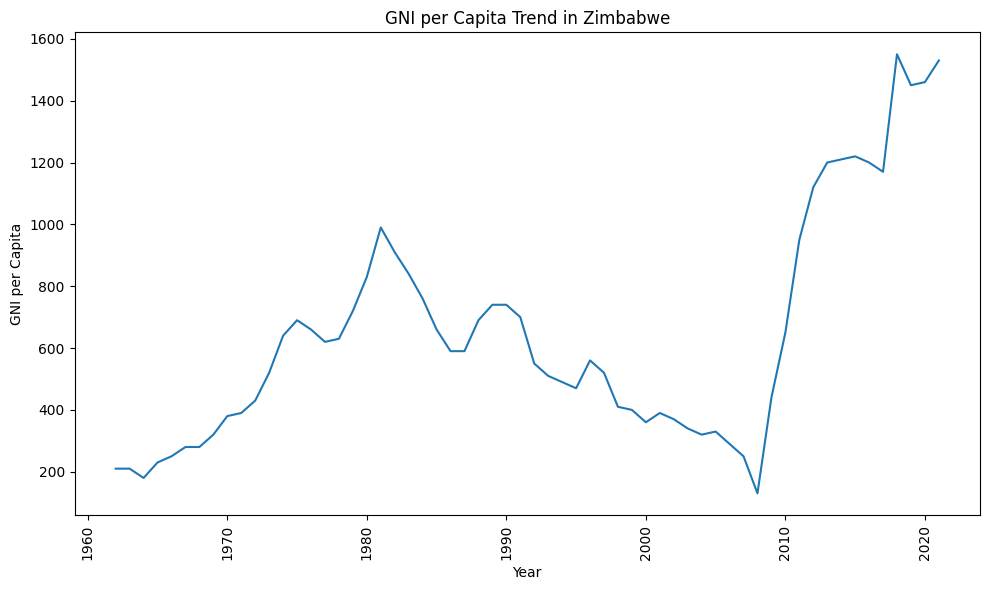

In [70]:
import matplotlib.pyplot as plt

df  = new_gni_df
# Dropping rows with missing values
df.dropna(inplace=True)
# Filter the DataFrame for Zimbabwe
zimbabwe_df = df[df['Country'] == 'Zimbabwe']

# Extract the relevant columns
years = zimbabwe_df['Year']
gni_per_capita = zimbabwe_df['GNI per Capita']

plt.figure(figsize=(10, 6))
plt.plot(years, gni_per_capita)
plt.xlabel('Year')
plt.ylabel('GNI per Capita')
plt.title('GNI per Capita Trend in Zimbabwe')
plt.xticks(rotation=90)  # Adjust the rotation of x-axis tick labels
plt.tight_layout()  # Improve spacing between the plot elements
plt.show()


##### 2- Plot bar chart for average GNI per Capita every 5 years for all countries

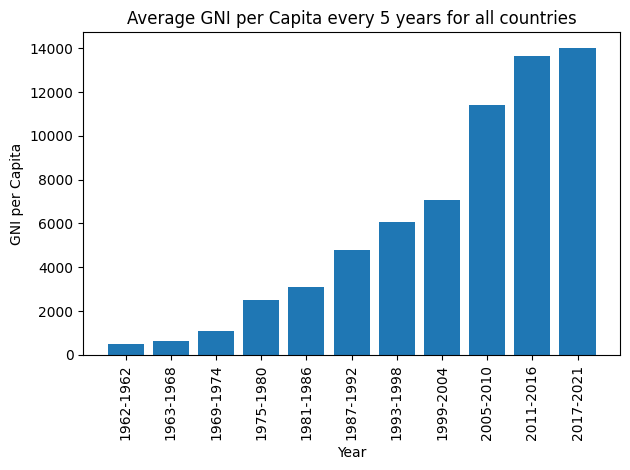

In [71]:
new_df = df.copy()
new_df = new_df[new_df['Year'] != 1960] # all GNI per Capita values in this year are nan

# Convert the 'Year' column to datetime format
new_df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by every 5 years and calculate the mean of GNI per Capita
new_df = new_df.groupby(pd.Grouper(key='Year', freq='6Y')).agg({'GNI per Capita': 'mean', 'Year': lambda x: f'{x.min().year}-{x.max().year}'})
new_df.reset_index(drop=True, inplace=True)

# Plot the bar chart
plt.bar(new_df['Year'], new_df['GNI per Capita'])
plt.xlabel('Year')
plt.ylabel('GNI per Capita')
plt.title('Average GNI per Capita every 5 years for all countries')
plt.xticks(rotation=90)  # Rotate x-axis tick labels for better visibility
plt.tight_layout()  # Adjust spacing between plot elements
plt.show()


##### 3- plot top 10 Countries with Highest Difference in GNI per Capita from 1960 to 2021

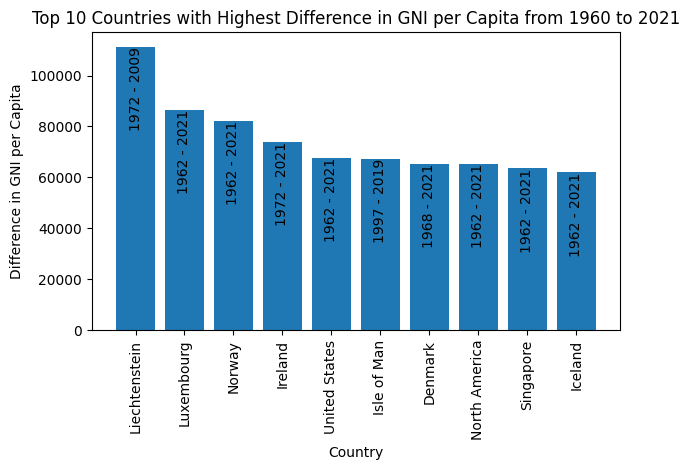

In [72]:
import collections
new_df = df.copy()
new_df.dropna(inplace=True)
new_df.reset_index(drop=True, inplace=True)
all_countries = list(set(new_df["Country"]))

# Create a hashmap to store the results
top_countries_diff_gni = collections.defaultdict(dict)

for country in all_countries:
    filtered_df = new_df[new_df['Country'] == country]
    filtered_df = filtered_df.sort_values('Year')

    # Calculate the difference in GNI per Capita between the first and latest years
    first_gni = filtered_df.iloc[0]['GNI per Capita']
    latest_gni = filtered_df.iloc[-1]['GNI per Capita']
    diff_gni = latest_gni - first_gni

    # Store the difference in GNI per Capita and the corresponding years in the hashmap
    top_countries_diff_gni[country]['diff_gni'] = diff_gni
    top_countries_diff_gni[country]['first_year'] = filtered_df.iloc[0]['Year']
    top_countries_diff_gni[country]['latest_year'] = filtered_df.iloc[-1]['Year']

# Sort the hashmap by the difference in GNI per Capita in descending order
top_countries_diff_gni = dict(sorted(top_countries_diff_gni.items(), key=lambda x: x[1]['diff_gni'], reverse=True))

# Get the top 10 countries with the highest difference in GNI per Capita
top_10_countries = dict(list(top_countries_diff_gni.items())[:10])

# Extract the data for plotting
countries = []
diff_gni_values = []
year_ranges = []

for country, values in top_10_countries.items():
    countries.append(country)
    diff_gni_values.append(values['diff_gni'])
    year_range = f"{values['first_year']} - {values['latest_year']}"
    year_ranges.append(year_range)

# Plot the bar graph
plt.bar(countries, diff_gni_values)
plt.xlabel('Country')
plt.ylabel('Difference in GNI per Capita')
plt.title('Top 10 Countries with Highest Difference in GNI per Capita from 1960 to 2021')
plt.xticks(rotation=90)

# Add year range labels inside each bar and rotate by 90 degrees
for i in range(len(countries)):
    plt.text(i, diff_gni_values[i], year_ranges[i], ha='center', va='top', rotation=90)

plt.tight_layout()
plt.show()

#### 4- Create a Table to show Countries with lowest and highest GNI value in each year

In [73]:
# Create a copy of the DataFrame to work with
new_df = df.copy()

# Remove rows with missing values from the DataFrame
new_df.dropna(inplace=True)

# Get a list of unique years from the "Year" column in the DataFrame
years = list(set(new_df["Year"]))

# Initialize empty lists to store the highest and lowest GNI country and value for each year
h_country = []
highest_GNI_value = []
l_country = []
lowest_GNI_value = []

# Iterate over each year
for i in years:
    # Filter the DataFrame to include only rows with the current year
    filtered_df = new_df[new_df['Year'] == i]

    # Find the row with the highest GNI per capita value and retrieve the country and GNI value
    filtered_df_high = filtered_df.sort_values('GNI per Capita', ascending=False).iloc[0]
    h_country.append(filtered_df_high["Country"])
    highest_GNI_value.append(filtered_df_high["GNI per Capita"])

    # Find the row with the lowest GNI per capita value and retrieve the country and GNI value
    filtered_df_low = filtered_df.sort_values('GNI per Capita').iloc[0]
    l_country.append(filtered_df_low["Country"])
    lowest_GNI_value.append(filtered_df_low["GNI per Capita"])

# Create a dictionary with the collected data
table_data = {
    'Year': years,
    'Highest GNI Country': h_country,
    'Highest GNI Value': highest_GNI_value,
    'Lowest GNI Country': l_country,
    'Lowest GNI Value': lowest_GNI_value
}

# Create a new DataFrame from the dictionary
table_df = pd.DataFrame(table_data)

# Return the resulting DataFrame
table_df


,Year,Highest GNI Country,Highest GNI Value,Lowest GNI Country,Lowest GNI Value
0,1962,United States,3280.0,Rwanda,40.0
1,1963,United States,3410.0,Myanmar,30.0
2,1964,United States,3610.0,Rwanda,30.0
3,1965,United States,3880.0,Myanmar,20.0
4,1966,United States,4190.0,Myanmar,20.0
5,1967,United States,4370.0,Myanmar,10.0
6,1968,United States,4740.0,Myanmar,10.0
7,1969,United States,5070.0,Myanmar,20.0
8,1970,United States,5230.0,Myanmar,20.0
9,1971,United States,5620.0,Myanmar,20.0


## Section 3
In this section,You will be using the dataframes generated in the last section to preform some supervised learning


Create a new dataset to look like the following containing (Country, Year, Gender, GNI per Capita, and BMI) by merging relevant datasets on Year and Country, and display the shape of the new dataset


```
           Country  Year    GNI per Capita    Gender   BMI
0      Afghanistan  2016           570.0  Both Sexes  23.0 
1      Afghanistan  2016           570.0        Male  22.3 
2      Afghanistan  2016           570.0      Female  23.7 
3      Afghanistan  2015           610.0  Both Sexes  22.9 
4      Afghanistan  2015           610.0        Male  22.3 
...            ...   ...             ...         ...    ...
20911     Zimbabwe  1976           660.0        Male  20.1 
20912     Zimbabwe  1976           660.0      Female  23.5 
20913     Zimbabwe  1975           690.0  Both Sexes  21.8 
20914     Zimbabwe  1975           690.0        Male  20.0 
20915     Zimbabwe  1975           690.0      Female  23.5
```

In [74]:
df1 = clean_bmi_data # bmi df
df2 = new_gni_df # gni df

- clean datasets before merge them

In [75]:
df1

,Country,Year,Both Sexes,Male,Female
0,Afghanistan,2016,23.0,22.3,23.7
1,Afghanistan,2015,22.9,22.3,23.6
2,Afghanistan,2014,22.8,22.2,23.5
3,Afghanistan,2013,22.8,22.1,23.4
4,Afghanistan,2012,22.7,22.0,23.3
...,...,...,...,...,...
8143,Zimbabwe,1979,22.0,20.3,23.6
8144,Zimbabwe,1978,21.9,20.2,23.6
8145,Zimbabwe,1977,21.9,20.2,23.5
8146,Zimbabwe,1976,21.8,20.1,23.5


In [76]:
# set(df1["Both Sexes"])

In [77]:
# set(df1["Male"])

In [78]:
# set(df1["Female"])

In [79]:
df1 = df1.replace('No d', np.nan) # change 'No d' to nan to drop it 
df1.dropna(inplace=True)

In [80]:
df1

,Country,Year,Both Sexes,Male,Female
0,Afghanistan,2016,23.0,22.3,23.7
1,Afghanistan,2015,22.9,22.3,23.6
2,Afghanistan,2014,22.8,22.2,23.5
3,Afghanistan,2013,22.8,22.1,23.4
4,Afghanistan,2012,22.7,22.0,23.3
...,...,...,...,...,...
8143,Zimbabwe,1979,22.0,20.3,23.6
8144,Zimbabwe,1978,21.9,20.2,23.6
8145,Zimbabwe,1977,21.9,20.2,23.5
8146,Zimbabwe,1976,21.8,20.1,23.5


In [81]:
df2

,Country,Country_code,Year,GNI per Capita
28,Aruba,ABW,1988,9840.0
29,Aruba,ABW,1989,11110.0
30,Aruba,ABW,1990,11570.0
31,Aruba,ABW,1991,12560.0
32,Aruba,ABW,1992,13610.0
...,...,...,...,...
16425,Zimbabwe,ZWE,2017,1170.0
16426,Zimbabwe,ZWE,2018,1550.0
16427,Zimbabwe,ZWE,2019,1450.0
16428,Zimbabwe,ZWE,2020,1460.0


In [82]:
# set(df2["GNI per Capita"])

In [83]:
df2.dropna(inplace=True)

In [84]:
# To get the required df, Both Sexes, Male, Female values should be merged into one column
BMI = df1.apply(lambda x: [x["Both Sexes"], x["Male"], x["Female"]], axis=1).tolist()
BMI = [item for sublist in BMI for item in sublist]

# Then create Gender Column
gender_list = ["Both Sexes", "Male", "Female"] * (len(BMI) // 3)

# drop not needed columns
columns_to_drop = ['Both Sexes', 'Male', 'Female']  # Specify the column names to drop
df1 = df1.drop(columns=columns_to_drop)

# merge the two tables and repeat each row 3 times
merged_table = pd.merge(df1, df2[['Country', 'Year', 'GNI per Capita']], on=['Country', 'Year'], how='left')
merged_table = merged_table.reindex(merged_table.index.repeat(3)).reset_index(drop=True)

# add Gender and BMI columns
merged_table["Gender"] = gender_list
merged_table["BMI"] = BMI
    

In [85]:
merged_table

,Country,Year,GNI per Capita,Gender,BMI
0,Afghanistan,2016,570.0,Both Sexes,23.0
1,Afghanistan,2016,570.0,Male,22.3
2,Afghanistan,2016,570.0,Female,23.7
3,Afghanistan,2015,610.0,Both Sexes,22.9
4,Afghanistan,2015,610.0,Male,22.3
...,...,...,...,...,...
23935,Zimbabwe,1976,660.0,Male,20.1
23936,Zimbabwe,1976,660.0,Female,23.5
23937,Zimbabwe,1975,690.0,Both Sexes,21.8
23938,Zimbabwe,1975,690.0,Male,20.0


Build a linear regression model to predict the BMI from GNI per Capita (one feature).

a) Data cleaning: You must drop missing values.

In [86]:
# TODO: You must drop the missing values form the new dataframe
set(merged_table["BMI"]) # Explore the BMI data to identify any elements that should be dropped
merged_table.dropna(inplace=True)
merged_table


,Country,Year,GNI per Capita,Gender,BMI
0,Afghanistan,2016,570.0,Both Sexes,23.0
1,Afghanistan,2016,570.0,Male,22.3
2,Afghanistan,2016,570.0,Female,23.7
3,Afghanistan,2015,610.0,Both Sexes,22.9
4,Afghanistan,2015,610.0,Male,22.3
...,...,...,...,...,...
23935,Zimbabwe,1976,660.0,Male,20.1
23936,Zimbabwe,1976,660.0,Female,23.5
23937,Zimbabwe,1975,690.0,Both Sexes,21.8
23938,Zimbabwe,1975,690.0,Male,20.0


b) Splitting the dataset into training and test dataset:
- Test dataset: Years [2016, 2015]. The test dataset size must be 960 rows.
- Training dataset: All years except [2016, 2015].

In [87]:
# TODO: Split the datasets into test and training as explained above
selected_years = [2015, 2016]
test_data = merged_table[merged_table['Year'].isin(selected_years)]
test_data


,Country,Year,GNI per Capita,Gender,BMI
0,Afghanistan,2016,570.0,Both Sexes,23.0
1,Afghanistan,2016,570.0,Male,22.3
2,Afghanistan,2016,570.0,Female,23.7
3,Afghanistan,2015,610.0,Both Sexes,22.9
4,Afghanistan,2015,610.0,Male,22.3
...,...,...,...,...,...
23815,Zimbabwe,2016,1200.0,Male,21.9
23816,Zimbabwe,2016,1200.0,Female,24.7
23817,Zimbabwe,2015,1220.0,Both Sexes,23.3
23818,Zimbabwe,2015,1220.0,Male,21.9


In [88]:
train_data = merged_table[~merged_table['Year'].isin(selected_years)]
train_data

,Country,Year,GNI per Capita,Gender,BMI
6,Afghanistan,2014,650.0,Both Sexes,22.8
7,Afghanistan,2014,650.0,Male,22.2
8,Afghanistan,2014,650.0,Female,23.5
9,Afghanistan,2013,680.0,Both Sexes,22.8
10,Afghanistan,2013,680.0,Male,22.1
...,...,...,...,...,...
23935,Zimbabwe,1976,660.0,Male,20.1
23936,Zimbabwe,1976,660.0,Female,23.5
23937,Zimbabwe,1975,690.0,Both Sexes,21.8
23938,Zimbabwe,1975,690.0,Male,20.0


Fitting the model on a training dataset to predict BMI.

In [89]:
# TODO: Fit the model on a training dataset to predict BMI
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Prepare the training data by extracting the input feature (GNI per Capita) and the target variable (BMI) from the train_data dataframe.
X_train = train_data[['GNI per Capita']]
y_train = train_data['BMI']

# Prepare the testing data by extracting the input feature and the target variable from the test_data dataframe.
X_test = test_data[['GNI per Capita']]
y_test = test_data['BMI']


model = LinearRegression() # Initialize the linear regression model.
model.fit(X_train, y_train) # Fit the model to the training data.

LinearRegression()

Evaluating the model on the test dataset by using the mean absolute error
(MAE).The MAE should be less than 12.

In [90]:
# TODO: Evaluating the model on the test dataset by using the mean absolute error (MAE)
y_pred = model.predict(X_test) # Use the trained model to make predictions on the testing data.

mae = mean_absolute_error(y_test, y_pred) # Evaluate the model by calculating the mean squared error (MSE) between the predicted values and the actual values.
mae


2.2200516014076634